In [50]:
import pandas as pd 

In [51]:
df = pd.read_excel('flight_price.xlsx')

In [52]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 💡 Data Preprocessing & Feature Engineering

In [53]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [54]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [55]:
df.dropna(inplace=True)

In [56]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [57]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [58]:
df['Airline'].unique()
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [59]:
air_value_count = df['Airline'].value_counts()

In [60]:
air_rare_value = air_value_count[air_value_count < 20].index

In [61]:
df['Airline'] = df['Airline'].replace(air_rare_value, 'others')

In [62]:
df['Airline'].value_counts()

Airline
Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
others                 23
Name: count, dtype: int64

In [63]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [64]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)

In [65]:
df['Day_Name'] = df['Date_of_Journey'].dt.day_name()

In [66]:
df[['Day_Name','Date_of_Journey']]

,Day_Name,Date_of_Journey
0,Sunday,2019-03-24
1,Wednesday,2019-05-01
2,Sunday,2019-06-09
3,Sunday,2019-05-12
4,Friday,2019-03-01
...,...,...
10678,Tuesday,2019-04-09
10679,Saturday,2019-04-27
10680,Saturday,2019-04-27
10681,Friday,2019-03-01


In [67]:
df['Source'].unique()
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [68]:
df['Destination'].unique()
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [69]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [70]:
# Function to convert 'Xh Ym' → total minutes
def duration_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())
    return (hours * 60 + minutes)


In [71]:
df['Duration_Minutes'] = df['Duration'].apply(duration_to_minutes)

In [72]:
df[['Duration_Minutes', 'Duration']]

,Duration_Minutes,Duration
0,170,2h 50m
1,445,7h 25m
2,1140,19h
3,325,5h 25m
4,285,4h 45m
...,...,...
10678,150,2h 30m
10679,155,2h 35m
10680,180,3h
10681,160,2h 40m


In [73]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [74]:
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

C:\Users\sures\AppData\Local\Temp\ipykernel_16952\2031549672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({


In [75]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [76]:
df['Additional_Info'].unique()
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [77]:
df['Additional_Info'] = df['Additional_Info'].str.lower().str.strip()

In [78]:
value_counts = df['Additional_Info'].value_counts()

In [79]:
rare_values = value_counts[value_counts < 20].index

In [80]:
df['Additional_Info'] = df['Additional_Info'].replace(rare_values, 'others')

In [81]:
df['Additional_Info'].value_counts()

Additional_Info
no info                         8347
in-flight meal not included     1982
no check-in baggage included     320
others                            33
Name: count, dtype: int64

In [82]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_Name', 'Duration_Minutes'],
      dtype='object')

In [83]:
df = df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'], axis=1)

In [84]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_Name,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,no info,3897,Sunday,170
1,Air India,Kolkata,Banglore,2,no info,7662,Wednesday,445
2,Jet Airways,Delhi,Cochin,2,no info,13882,Sunday,1140
3,IndiGo,Kolkata,Banglore,1,no info,6218,Sunday,325
4,IndiGo,Banglore,New Delhi,1,no info,13302,Friday,285
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,no info,4107,Tuesday,150
10679,Air India,Kolkata,Banglore,0,no info,4145,Saturday,155
10680,Jet Airways,Banglore,Delhi,0,no info,7229,Saturday,180
10681,Vistara,Banglore,New Delhi,0,no info,12648,Friday,160


In [ ]:
df.drop(df[df['Duration_Minutes'] < 60].index, inplace=True)

## Random Forest Regressor

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(['Price'],axis=1),df['Price'],test_size=0.2)

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [88]:
transformer = ColumnTransformer(
    transformers=[
        ('trns1', OneHotEncoder(sparse_output=False, drop='first'), ['Airline', 'Source', 'Destination', 'Additional_Info', 'Day_Name'])
    ],
    remainder='passthrough'
)

In [89]:
xtrain = transformer.fit_transform(xtrain)
xtest = transformer.transform(xtest)

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [92]:
model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

In [93]:
model.score(xtest,ytest)

0.7307077693058428

In [94]:
pridict = model.predict(xtest)

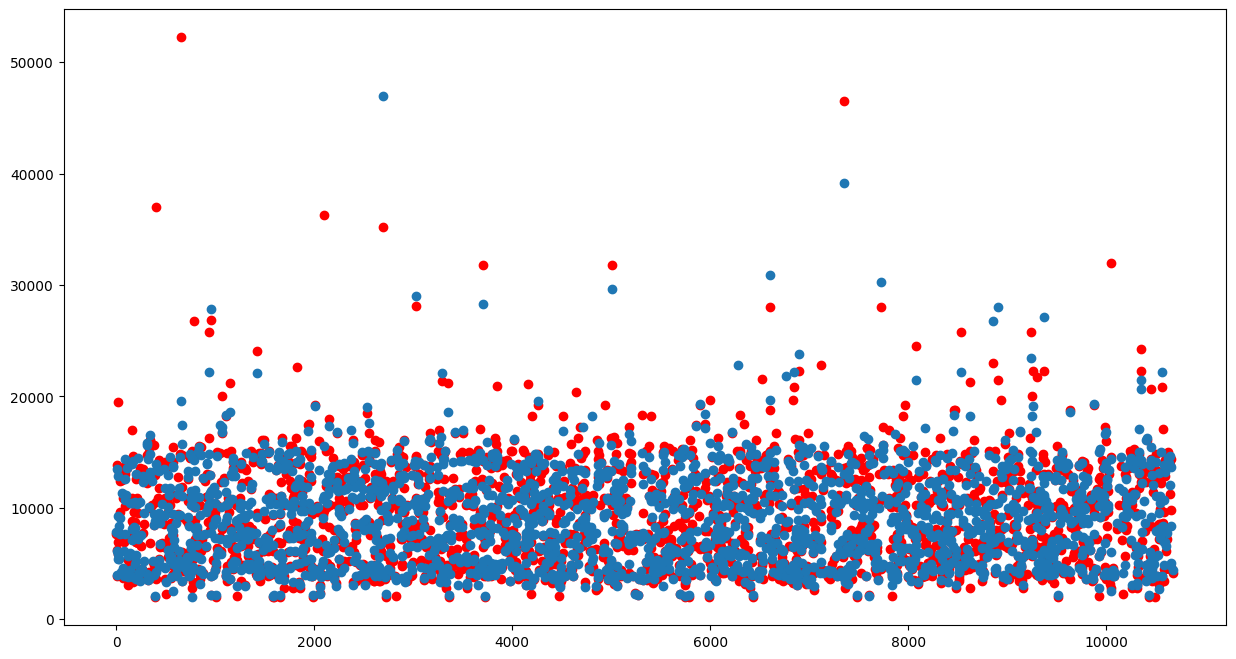

In [95]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 8))
plt.scatter(ytest.index,ytest,color='red')
plt.scatter(ytest.index,pridict)
plt.show()

## XGBoost

In [96]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [97]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Price'],axis=1),df['Price'],test_size=0.2)

In [98]:
transformer = ColumnTransformer(
    transformers=[
        # One-hot encode these columns
        ('trns1', OneHotEncoder(sparse_output=False, drop='first'), ['Airline', 'Source', 'Destination', 'Additional_Info', 'Day_Name']),
        
        # Scale 'Duration_Minutes'
        ('scale1', MinMaxScaler(), ['Duration_Minutes'])  # or use StandardScaler()
    ],
    remainder='passthrough'  # leave the rest of the columns as is
)

In [99]:
s_x_train = transformer.fit_transform(x_train)
s_x_test = transformer.fit_transform(x_test)

In [100]:
model = XGBRegressor(
    n_estimators=100,       # number of trees
    learning_rate=0.1,      # step size shrinkage
    max_depth=6,            # depth of each tree
    random_state=42
)

In [101]:
model.fit(s_x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [102]:
y_pred = model.predict(s_x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [103]:
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

MAE: 1646.1296921383291
MSE: 6760085.372499945
R² Score: 0.6599067449569702


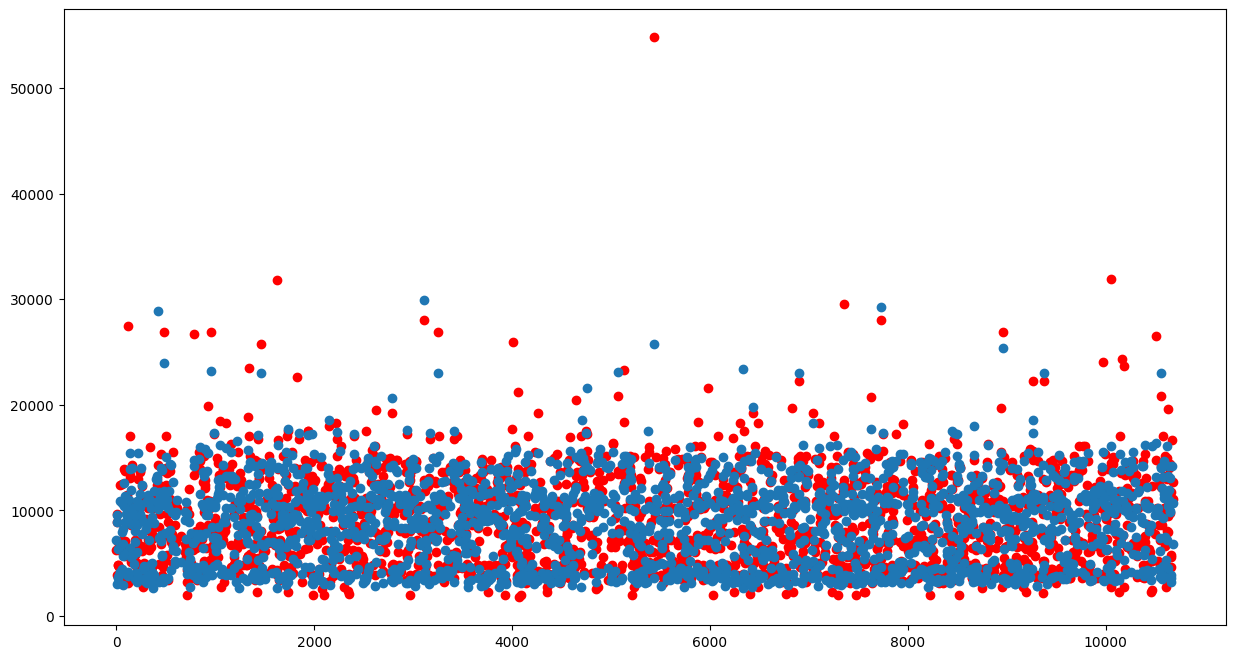

In [104]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 8))
plt.scatter(y_test.index,y_test,color='red')
plt.scatter(y_test.index,y_pred)
plt.show()

## Neural Network

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(['Price'],axis=1),df['Price'],test_size=0.2)

In [107]:
transformer = ColumnTransformer(
    transformers=[
        # One-hot encode these columns
        ('trns1', OneHotEncoder(sparse_output=False, drop='first'), ['Airline', 'Source', 'Destination', 'Additional_Info', 'Day_Name']),
        
        # Scale 'Duration_Minutes'
        ('scale1', MinMaxScaler(), ['Duration_Minutes'])  # or use StandardScaler()
    ],
    remainder='passthrough'  # leave the rest of the columns as is
)

In [108]:
s_xtrain = transformer.fit_transform(xtrain)
s_xtest = transformer.fit_transform(xtest)

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [110]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(28,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])


C:\Users\sures\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [112]:
model.fit(s_xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 101758808.0000 - mae: 8984.9092 - val_loss: 82506848.0000 - val_mae: 7348.3335
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50068412.0000 - mae: 5566.2563 - val_loss: 24761990.0000 - val_mae: 2863.0547
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14712622.0000 - mae: 2626.9175 - val_loss: 21914276.0000 - val_mae: 2568.3982
Epoch 4/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12829785.0000 - mae: 2354.8013 - val_loss: 20535470.0000 - val_mae: 2366.6729
Epoch 5/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10129837.0000 - mae: 2144.8545 - val_loss: 19623444.0000 - val_mae: 2275.4214
Epoch 6/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9673131.0000 - mae: 2047.6008 - val_loss: 19020420.0000 - val_mae: 2186.9614
Epoch 7/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9571070.0000 - mae: 1976.1599 - val_loss: 18590584.0000 - val_mae: 2133.2798
Epoch 8/100
241/241 ━━━━━━━━

In [113]:
y_pred = model.predict(s_xtest)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [114]:
y_pred.shape

(2137, 1)

In [115]:
ytest.shape

(2137,)

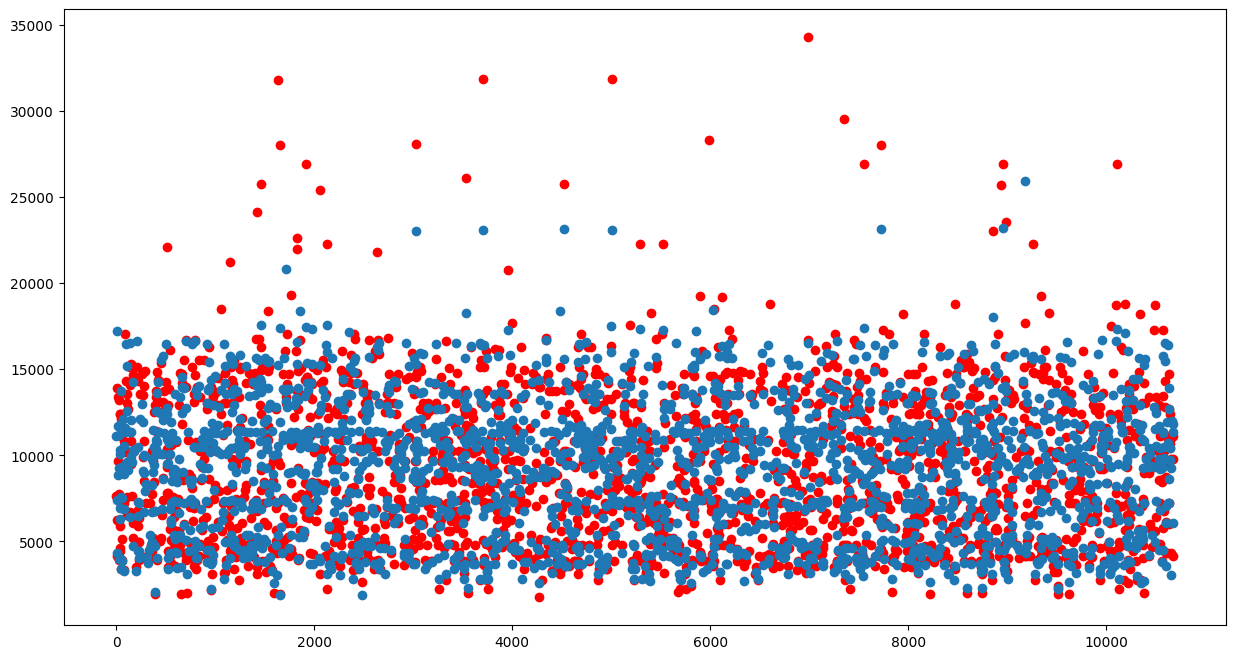

In [116]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 8))
plt.scatter(ytest.index,ytest,color='red')
plt.scatter(ytest.index,y_pred)
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)


MSE: 6355336.080745816
MAE: 1728.6033473427628
R² Score: 0.6777297258377075
